In [40]:
from tsetmc.Get import all_tickers, trade_history

ALL = all_tickers(stock_rights=False)
result = {}

for num_id in ALL.index:
    try:
        df = trade_history(num_id, adjust=True).iloc[1:]
    except Exception as e:
        print(e)
    df = df.astype("int32")

    # Close Change Percent:
    df["ccp"] = (df["close"] - df["yesterday"]) / df["yesterday"] * 100

    # close-price and last-price difference in yesterday:
    df["yesterday_diff"] = (df["last"] - df["close"]) / df["yesterday"] * 100
    df["yesterday_diff"] = df["yesterday_diff"].shift(1)

    # filter low trade days:
    df = df[df["count"] > 50]

    # drop outlier data:
    df = df[(df["ccp"] <= 5) & (df["ccp"] >= -5)]
    df = df[(df["yesterday_diff"] <= 5) & (df["yesterday_diff"] >= -5)]
    
    # correlation:
    corr = df.corr().loc["ccp", "yesterday_diff"] * 100
    print(ALL.loc[num_id, "symbol"], corr)
    
    result[ALL.loc[num_id, "symbol"]] = corr

آبادا 40.217118460217385
آپ 44.42855924958063
آسيا 45.0596386128658
آكنتور 47.333383330808324
آلومينا nan
اپال 43.09714551278711
اتكام 41.54855019657241
اجداد nan
اخابر 41.61590779177457
اردستان nan
اروند nan
افق 46.22573795140602
اكالا nan
اكتيو nan
البرز 45.75619330071944
اميد 50.09947810328528
امين 45.240525363424204
انرژي1 nan
انرژي2 nan
انرژي3 48.76499339373495
باختر nan
بالبر 48.224332186749564
بايكا nan
بترانس 45.36985876684814
بتك nan
بجهرم nan
برانسفو nan
بركت 46.61099409967747
بسويچ 49.84358542840053
بشهاب 45.65833257928457
بفجر 37.37754946968274
بكاب 40.73299968560819
بكام 43.73612562752233
بموتو 40.25704963676959
بنيرو 45.190502186997136
بورس 49.78374001238192
بوعلي 39.755686131947456
پارتا 19.525573830728966
پارس 44.39084014874787
پارسان 44.40486039437873
پارسيان 45.298727926152495
پاسا 42.81444936293549
پاكشو 40.5562461429089
پتاير 42.19365012097771
پترول 43.36791296786288
پخش اول nan
پدرخش 43.49605059993224
پدنا nan
پرداخت 40.066333383684736
پرديس 45.942727630659554
پرشي

كگل 37.17148268351392
كلوند 49.40074145144194
كماسه 45.25516962759048
كمنگنز 48.226915861084095
كنور 41.83277518286961
كنيلو 47.701338765848114
كهرام 39.21743792825942
كهمدا 49.29331866961335
كورز nan
كوير 54.29126526996413
كيانا nan
كيمياتك 43.15382161564179
لابسا 46.56629955531032
لازما nan
لبهمن nan
لبوتان 45.09960410492166
لپارس 46.00728468063873
لپويا nan
لپيام nan
لجام nan
لخانه nan
لخزر 39.37083979495834
لسرما 45.22893586996593
لكما 25.527389763801995
لمخابر nan
لوتوس 48.87041427456714
ما 41.65725566664365
مبين 39.408699163335
مدار nan
مداران 42.27423120090765
مرقام 46.23607969541697
ملت 42.581865241482554
ميدكو 48.08568994483176
نبروج nan
نبورس 53.59723078863783
نتوس nan
نكالا nan
نمرينو 37.52722166069284
نوري 49.85835262367266
هاي وب 42.17478933358976
همراه 40.59458192487162
وآذر 43.331016421813516
وآردل nan
واتي 42.522111954798305
واعتبار 43.91523343276012
والبر 40.257910312400575
واميد 36.761839000712854
وانصار 44.44207732384085
وايران 42.48986044265239
وبانك 38.938514461380

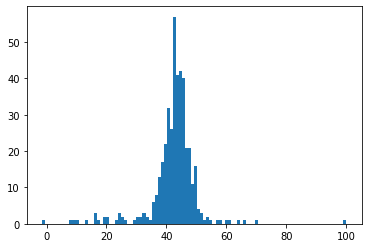

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

S = pd.Series(result)
plt.hist(S, bins=100)
plt.show()

In [43]:
print("average of correlations: ", S.mean())

average of correlations:  42.483523223982914
